https://huggingface.co/docs/transformers/en/preprocessing

In [1]:
from transformers import AutoTokenizer

In [3]:
tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-cased")

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [4]:
encoded_input = tokenizer("Do not meddle in the affairs of wizards, for they are subtle and quick to anger")
print(encoded_input)

{'input_ids': [101, 2091, 1136, 1143, 13002, 1107, 1103, 5707, 1104, 16678, 1116, 117, 1111, 1152, 1132, 11515, 1105, 3613, 1106, 4470, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [5]:
tokenizer.decode(encoded_input["input_ids"])

2024-10-13 22:53:18.888073: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-13 22:53:18.899665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 22:53:18.912166: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 22:53:18.915963: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 22:53:18.926692: I tensorflow/core/platform/cpu_feature_guar

'[CLS] Do not meddle in the affairs of wizards, for they are subtle and quick to anger [SEP]'

In [10]:
batch_sentences = [
    "But what about second breakfast?",
    "Don't think he knows about second breakfast, Pip",
    "What about elevensies?"
]
encoded_inputs = tokenizer(batch_sentences, padding=True, truncation=True, return_tensors="pt")
print(encoded_inputs)

{'input_ids': tensor([[  101,  1252,  1184,  1164,  1248,  6462,   136,   102,     0,     0,
             0,     0,     0,     0],
        [  101,  1790,   112,   189,  1341,  1119,  3520,  1164,  1248,  6462,
           117, 21902,  1643,   102],
        [  101,  1327,  1164,  5450, 23434,   136,   102,     0,     0,     0,
             0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]])}


# Audio

In [11]:
from datasets import load_dataset, Audio

In [12]:
dataset = load_dataset("PolyAI/minds14", name="en-US", split="train")

In [13]:
dataset[0]["audio"]

{'path': '/home/user/.cache/huggingface/datasets/downloads/extracted/b63b156957c7ca71c29ec1b1c70b7c01f82e37338e69d6b00d0e88dc4d3d3ee4/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
         0.        ,  0.        ]),
 'sampling_rate': 8000}

In [14]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16_000))
dataset[0]["audio"]

{'path': '/home/user/.cache/huggingface/datasets/downloads/extracted/b63b156957c7ca71c29ec1b1c70b7c01f82e37338e69d6b00d0e88dc4d3d3ee4/en-US~JOINT_ACCOUNT/602ba55abb1e6d0fbce92065.wav',
 'array': array([ 1.70562416e-05,  2.18727451e-04,  2.28099874e-04, ...,
         3.43842403e-05, -5.96364771e-06, -1.76846661e-05]),
 'sampling_rate': 16000}

In [17]:
from transformers import AutoFeatureExtractor
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

/home/user/dev/transformer/venv/lib/python3.12/site-packages/transformers/configuration_utils.py:302: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [18]:
audio_input = [dataset[0]["audio"]["array"]]
feature_extractor(audio_input, sampling_rate=16000)

{'input_values': [array([ 3.0293269e-04,  2.7676334e-03,  2.8821775e-03, ...,
        5.1470479e-04,  2.1597825e-05, -1.2164921e-04], dtype=float32)]}

In [19]:
dataset[0]["audio"]["array"].shape

(173398,)

In [20]:
dataset[1]["audio"]["array"].shape

(106496,)

In [21]:
def preprocess_function(examples):
    audio_arrays = [x["array"] for x in examples["audio"]]
    inputs = feature_extractor(
    audio_arrays,
    sampling_rate=16000,
    padding=True,
    max_length=100000,
    truncation=True
    )
    return inputs

In [22]:
processed_dataset = preprocess_function(dataset[:5])

In [23]:
processed_dataset["input_values"][0].shape

(100000,)

In [24]:
processed_dataset["input_values"][1].shape

(100000,)

# Computer Vision

In [25]:
from datasets import load_dataset
dataset = load_dataset("food101", split="train[:100]")

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

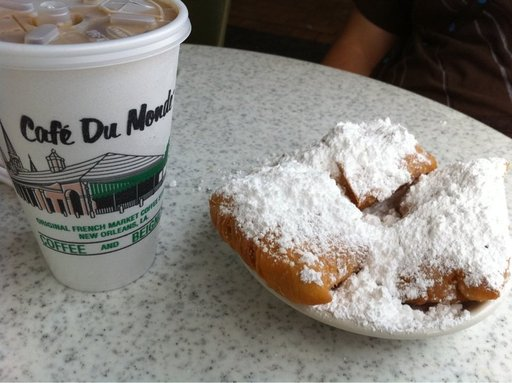

In [31]:
dataset[2]["image"]

In [27]:
from transformers import AutoImageProcessor
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

In [32]:
from torchvision.transforms import RandomResizedCrop, ColorJitter, Compose

size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ColorJitter(brightness=0.5, hue=0.5)])

In [33]:
def transforms(examples):
    images = [_transforms(img.convert("RGB")) for img in examples["image"]]
    examples["pixel_values"] = image_processor(images, do_resize=False, return_tensors="pt")["pixel_values"]
    return examples

In [35]:
dataset.set_transform(transforms)

In [36]:
dataset[0].keys()

dict_keys(['image', 'label', 'pixel_values'])

In [40]:
import numpy as np
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


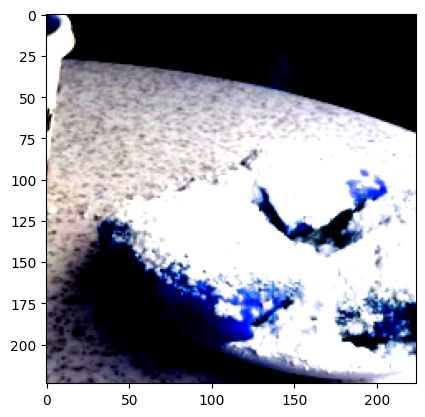

In [44]:
img = dataset[2]["pixel_values"]
plt.imshow(img.permute(1, 2, 0))

In [45]:
def collate_gn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel, values, return_tensors="pt")
    labels = [item["labels"] for item in batch]
    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels
    return batch

# Multimodal

In [46]:
from datasets import load_dataset

In [47]:
lj_speech = load_dataset("lj_speech", split="train")

lj_speech.py:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.88k [00:00<?, ?B/s]

The repository for lj_speech contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/lj_speech.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


FSTimeoutError: 